In [1]:
import math 
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import noise
import random 

from generate_world import world_map_create


SIZE = 1024

In [2]:
def noise_map(size, res, octaves=1, persistence=.5, lacunarity=2, seed=1):
    def _get_noise(x, y):
        return noise.snoise3(
            (x)/scale,
            y/scale,
            z=seed,
            octaves=octaves,
            persistence=persistence,
            lacunarity=lacunarity
        )
    scale = size/res
    return np.array(
        [[(_get_noise(x, y)) for x in range(size)] for y in range(size)]
    )

In [3]:
def plot_img(pic, cmap='bwr'):
    plt.figure(figsize=(8, 6))
    img = plt.imshow(pic, cmap=cmap)
    plt.colorbar(img, orientation='vertical')
    plt.show()

def plot_3d(pic):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(14, 14))
    X, Y = np.meshgrid(np.arange(SIZE), np.arange(SIZE))
    surf = ax.plot_surface(X, Y, pic, cmap="coolwarm", linewidth=0, antialiased=False) #
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

In [4]:
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def map_round(n):
    return float(int(n*10)) / 10

def random_seed():
    seed = random.randint(10000,99999)
    print(f"seed {seed}")
    return seed

In [5]:
def create_mask_map(size=1024):
    x, y = np.meshgrid(np.linspace(-1, 1, size), np.linspace(-1, 1, size))
    mask = np.sqrt((x) ** 2 + (y) ** 2)
    mask = normalize(mask)
    # mask = np.array([[mask[x,y] if mask[x,y] > .3 else .3 for x in range(SIZE)]for y in range(SIZE)]) # incr inner circle
    # Flatten outer circle
    mask = [
        [mask[x, y] if mask[x, y] < 0.8 else 0.8 for x in range(size)]
        for y in range(size)
    ]
    mask = normalize(np.array(mask))
    mask *= -1
    return mask

def combine_maps(map1, map2):
    map1 += map2
    map1 = np.array([[map1[x,y] if map1[x,y]>=0 else 0 for x in range(SIZE)]for y in range(SIZE)])
    return normalize(map1)


# heigth_map = normalize(noise_map(SIZE, res=1, octaves=2, persistence=0.5, lacunarity=4, seed=random_seed()))
# mask = create_mask()
# heigth_map = combine_maps(heigth_map, mask)
# plot_img(heigth_map, 'gray')
# plot_3d(heigth_map)

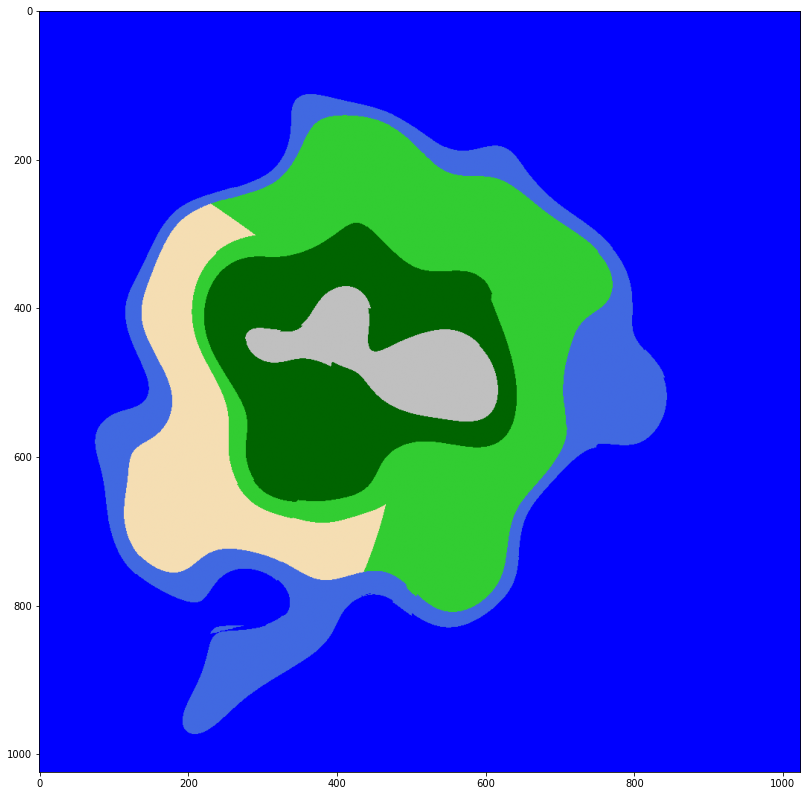

In [35]:
heigth_map = normalize(noise_map(SIZE, res=1, octaves=2, persistence=0.5, lacunarity=4, seed=34315))
mask = create_mask_map()
heigth_map = combine_maps(heigth_map, mask)

heat_map = normalize(noise_map(SIZE, res=1, octaves=1, persistence=.5, lacunarity=2)) # seed=random_seed()
# plot_img(heat_map)

world_map = world_map_create(heigth_map, heat_map, SIZE)
world_map_biome = [[world_map[x, y].color() for x in range(SIZE)] for y in range(SIZE)]

plt.figure(figsize=(14, 14))
img = plt.imshow(world_map_biome)
plt.show()

seed 58621


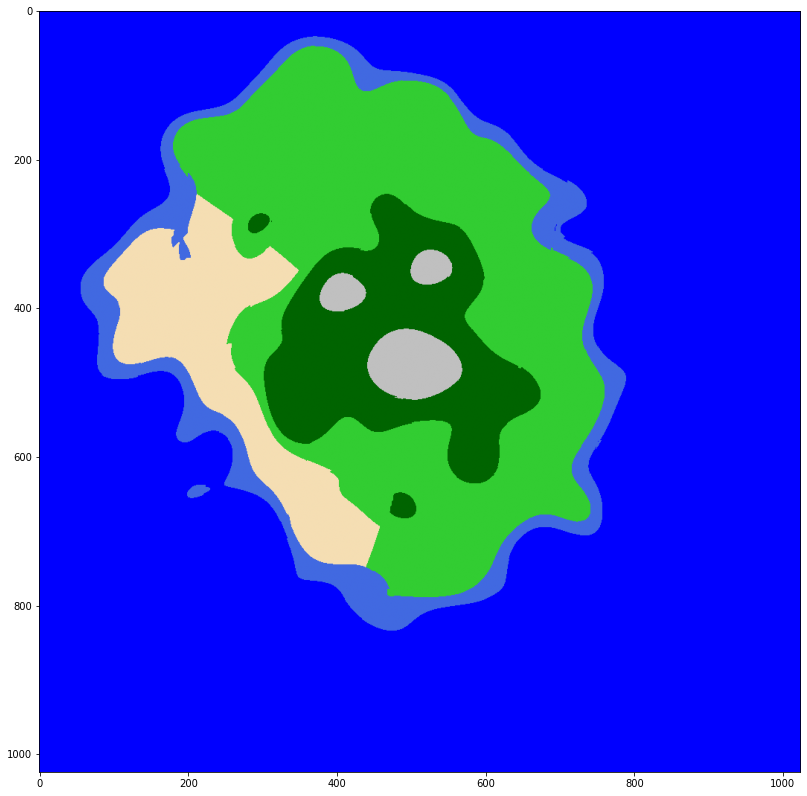

In [43]:
heigth_map = normalize(noise_map(SIZE, res=1, octaves=2, persistence=0.4, lacunarity=6, seed=random_seed()))
heigth_map = combine_maps(heigth_map, mask)

world_map = world_map_create(heigth_map, heat_map, SIZE)
world_map_biome = [[world_map[x, y].color() for x in range(SIZE)] for y in range(SIZE)]

plt.figure(figsize=(14, 14))
img = plt.imshow(world_map_biome)
plt.show()

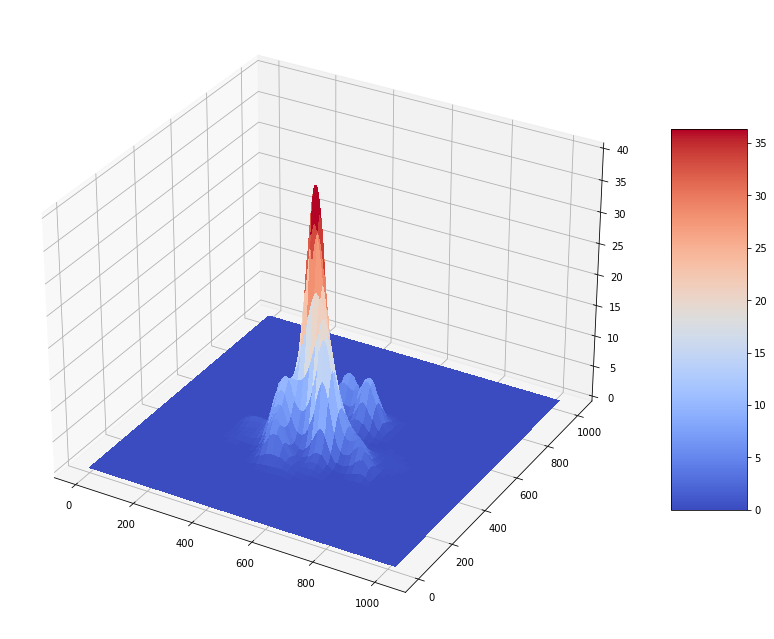

In [42]:
pic = heigth_map
pic = np.array([[math.pow(pic[x][y], 4) for x in range(SIZE)] for y in range(SIZE)])
pic = pic * 40
plot_3d(pic)

In [17]:
math.pow(pic[500][500], 2)

810.6695470376784